# Required Packages, Modules and Utilities

In [1]:
# Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

# Data Extraction

In [2]:
# Import csv file to DataFrame format
cad_data = pd.read_csv("cad_dataset.csv")

In [3]:
# Show first five rows
cad_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Data Cleaning

In [4]:
# Function to get dataset summary
def get_dataset_summary(df):
    print('.' * 100)
    print(f'No. of Rows: {df.shape[0]}        No. of Columns: {df.shape[1]}')
    print('.' * 100)

    data_summary = pd.DataFrame({
        'DataType': df.dtypes,
        'Unique Values': df.nunique(),
        'Missing Values': df.isnull().sum(),
        'Infinity Values': df.isin([np.inf, -np.inf]).sum()
    })

    print(data_summary)
    print('.' * 100)

In [5]:
# First view of dataset
get_dataset_summary(cad_data)

....................................................................................................
No. of Rows: 1025        No. of Columns: 14
....................................................................................................
         DataType  Unique Values  Missing Values  Infinity Values
age         int64             41               0                0
sex         int64              2               0                0
cp          int64              4               0                0
trestbps    int64             49               0                0
chol        int64            152               0                0
fbs         int64              2               0                0
restecg     int64              3               0                0
thalach     int64             91               0                0
exang       int64              2               0                0
oldpeak   float64             40               0                0
slope       int64           

# Exploratory Data Analysis

In [6]:
# Show data
cad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# Shows the percentiles of numerical data (datatype - float & int)
# Switch index and columns
cad_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


## Visualizations

1    526
0    499
Name: target, dtype: int64 

CAD Disease       526
No CAD Disease    499
Name: target_category, dtype: int64


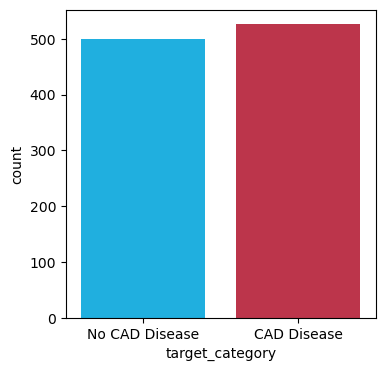

In [8]:
# Map values of the 'target' column to categories
cad_data['target_category'] = cad_data['target'].map(lambda a: 'No CAD Disease' if a == 0 else 'CAD Disease')

print(cad_data['target'].value_counts(), '\n')
print(cad_data['target_category'].value_counts())

plt.figure(figsize=(4, 4))
sns.countplot(data=cad_data, x='target_category', palette=['#00BFFF', '#D21F3C'])
plt.show()

50s    422
60s    275
40s    237
30s     57
70s     34
Name: age_category, dtype: int64


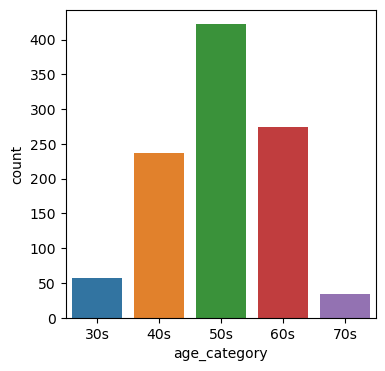

age_category  target_category
30s           CAD Disease        0.736842
              No CAD Disease     0.263158
40s           CAD Disease        0.662447
              No CAD Disease     0.337553
50s           No CAD Disease     0.511848
              CAD Disease        0.488152
60s           No CAD Disease     0.632727
              CAD Disease        0.367273
70s           CAD Disease        0.588235
              No CAD Disease     0.411765
Name: target_category, dtype: float64


target_category  CAD Disease  No CAD Disease
age_category                                
30s                73.684211       26.315789
40s                66.244726       33.755274
50s                48.815166       51.184834
60s                36.727273       63.272727
70s                58.823529       41.176471


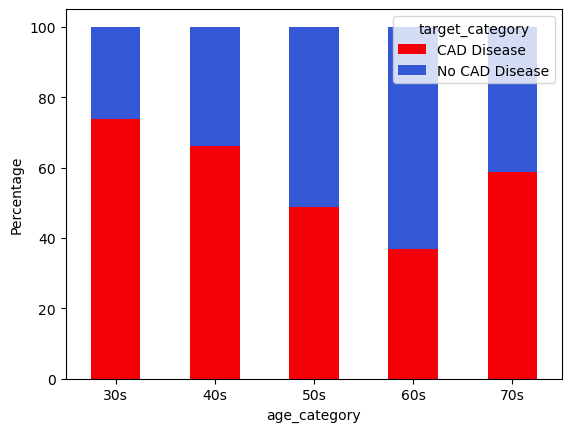

In [9]:
# Map values of the 'age' column to categories
# Group data by age ranges
age_bins = [28, 40, 50, 60, 70, 80]
age_labels = ['30s', '40s', '50s', '60s', '70s']

cad_data['age_category'] = pd.cut(cad_data['age'], bins=age_bins, labels=age_labels, right=False)
print(cad_data['age_category'].value_counts())

plt.figure(figsize=(4, 4))
sns.countplot(data=cad_data, x='age_category')
plt.show()

# Calculate incidence (%) of cardiovascular disease by age group
print(cad_data.groupby('age_category')['target_category'].value_counts(normalize=True))
print('\n')

age_category_percentages = cad_data.groupby('age_category')['target_category'].value_counts(normalize=True).unstack() * 100
print(age_category_percentages)

age_category_percentages.plot(kind='bar', stacked=True, color=['#F40009', '#3457D5'], rot=0)
plt.ylabel('Percentage')
plt.show()

1    713
0    312
Name: sex, dtype: int64 

Female    713
Male      312
Name: sex_category, dtype: int64 



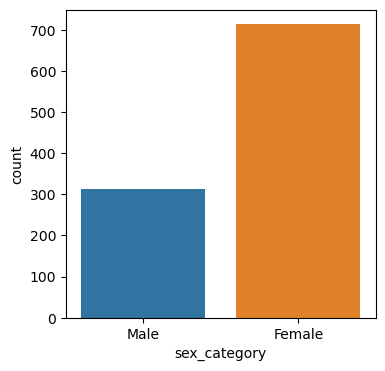

sex_category  target_category
Female        No CAD Disease     413
              CAD Disease        300
Male          CAD Disease        226
              No CAD Disease      86
Name: target_category, dtype: int64 

target_category  CAD Disease  No CAD Disease
sex_category                                
Female             42.075736       57.924264
Male               72.435897       27.564103


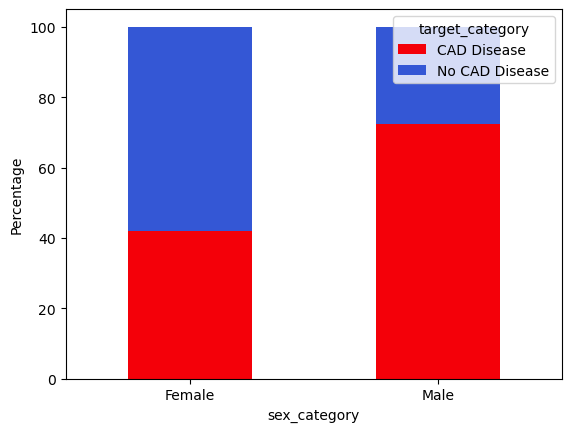

In [10]:
# Map values of the 'sex' column to categories
cad_data['sex_category'] = cad_data['sex'].map(lambda a: 'Male' if a == 0 else 'Female')
print(cad_data['sex'].value_counts(), '\n')
print(cad_data['sex_category'].value_counts(), '\n')

plt.figure(figsize=(4, 4))
sns.countplot(data=cad_data, x='sex_category', order=['Male', 'Female'])
plt.show()

# Calculate incidence (%) of cardiovascular disease by gender
print(cad_data.groupby('sex_category')['target_category'].value_counts(), '\n')

gender_percentages = cad_data.groupby('sex_category')['target_category'].value_counts(normalize=True).unstack() * 100
print(gender_percentages)

gender_percentages.plot(kind='bar', stacked=True, color=['#F40009', '#3457D5'], rot=0)
plt.ylabel('Percentage')
plt.show()

1    513
0    497
2     15
Name: restecg, dtype: int64 

ST-T Wave Abnormality     513
Normal                    497
Hypertrophy                15
Name: restecg_category, dtype: int64 

target_category  restecg_category      
CAD Disease      ST-T Wave Abnormality     309
                 Normal                    214
                 Hypertrophy                 3
No CAD Disease   Normal                    283
                 ST-T Wave Abnormality     204
                 Hypertrophy                12
Name: restecg_category, dtype: int64


<Axes: xlabel='target_category', ylabel='count'>

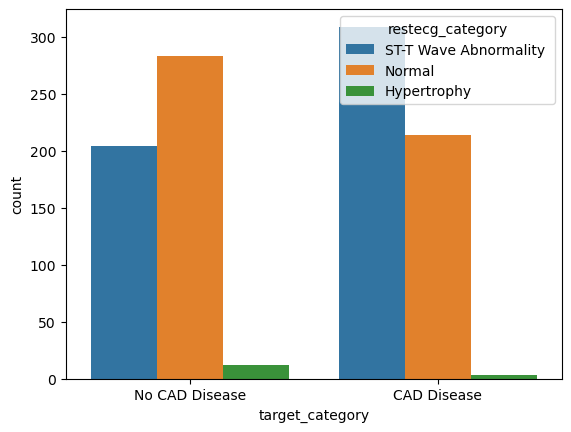

In [11]:
# Map values of the 'restecg' column to categories
rest_ecg_to_cat_func = lambda a: 'Normal' if a == 0 else 'ST-T Wave Abnormality ' if a == 1 else 'Hypertrophy'
cad_data['restecg_category'] = cad_data['restecg'].map(rest_ecg_to_cat_func)

print(cad_data['restecg'].value_counts(), '\n')
print(cad_data['restecg_category'].value_counts(), '\n')

# Count the occurrences of each value of resting electrocardiographic results for each target category
print(cad_data.groupby('target_category')['restecg_category'].value_counts())

sns.countplot(data=cad_data, hue='restecg_category', x='target_category')

target_category
CAD Disease       158.585551
No CAD Disease    139.130261
Name: thalach, dtype: float64


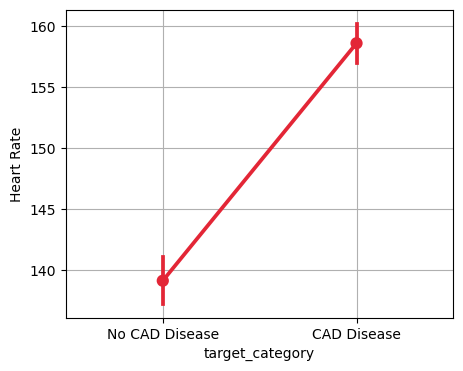

In [12]:
# Show average maximum heart rate achieved during a stress test
# Error bar shows 95% confidence interval

print(cad_data.groupby('target_category')['thalach'].mean())

plt.figure(figsize=(5, 4))
sns.pointplot(data=cad_data, x='target_category', y='thalach', color='#E32636')

plt.ylabel('Heart Rate')

plt.grid()
plt.show()

# Feature Selection

In [13]:
# List of columns to remove
columns_to_remove = [col for col in cad_data.columns if col.endswith('_category')]
print(columns_to_remove)

# Removing rows where the column names end in '_category'
training_data = cad_data.drop(columns=columns_to_remove)

['target_category', 'age_category', 'sex_category', 'restecg_category']


## Separation of Features and Target Variable

In [14]:
# X: Features for prediction
X = training_data.drop(columns=['target']).values

print(X.shape)

(1025, 13)


In [15]:
# y: Target to predict
y = cad_data['target'].values

print(y.shape)

(1025,)


# Model Fitting and Evaluation

In [16]:
SEED = 42  # Define your seed value for reproducibiity

# Split data into 70% training set and 30% test set
# X: features; y: targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

print('Training Set Shape: ', X_train.shape)
print('Test Set Shape: ', X_test.shape)

Training Set Shape:  (717, 13)
Test Set Shape:  (308, 13)


In [17]:
# Define parameter grids

# For Decision Tree 
param_grid_dt = {
    'criterion': ['gini', 'entropy'],          # Split criterion
    'splitter': ['best', 'random'],            # Strategy to choose the split at each node
    'max_depth': [None, 10, 20],               # Maximum depth of the tree
    'max_features': [None, 'log2', 'sqrt']     # Number of features to consider when looking for the best split
}


# For KNN
param_grid_knn = {
    'n_neighbors': [5, 7, 10],                                # Number of neighbors   
    'weights': ['uniform', 'distance'],                       # Different weight options
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],   # Algorithm to compute the nearest neighbors
    'metric': ['euclidean', 'manhattan']                      # Distance metrics
}


# For Linear SVC
param_grid_ls = {
    'loss': ['hinge', 'squared_hinge'],         # Loss function
    'tol': [1e-4, 1e-3, 1e-2],                  # Tolerance for stopping criteria
    'C': [0.1, 1, 10],                          # Regularization parameter
    'max_iter': [1000, 2000, 3000]              # Maximum number of iterations
}


# For Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],                    # Regularization type
    'C': [0.1, 1, 10],                          # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],            # Solver for optimization
    'max_iter': [100, 200, 300]                 # Maximum number of iterations 
}


# For Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],            # Number of trees in the forest
    'criterion': ['gini', 'entropy'],           # Function to measure the quality of a split
    'max_depth': [None, 10, 20],                # Maximum depth of the tree
    'max_features': [None, 'log2', 'sqrt']      # Number of features to consider when looking for the best split
}

In [18]:
# Instantiate models and parameter grids

model_and_parameters = {
    "Decision Tree": [DecisionTreeClassifier(random_state=SEED), param_grid_dt],
    
    "KNN": [KNeighborsClassifier(), param_grid_knn],
    
    "Linear SVC": [LinearSVC(random_state=SEED), param_grid_ls],
    
    "Logistic Regression": [LogisticRegression(random_state=SEED), param_grid_lr],
    
    "Random Forest": [RandomForestClassifier(random_state=SEED), param_grid_rf]
}

## Grid Search Cross Validation

In [19]:
# Dictionary to store outcomes for each model
outcomes = {}

# Perform grid search for each model
for model_name, (model, param_grid) in model_and_parameters.items():
    
    # Define cross-validation strategy
    kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)
    
    # Define GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
    
    # Perform grid search
    grid_search.fit(X_train, y_train)
    
    # Store outcomes in dictionary
    outcomes[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'best_estimator': grid_search.best_estimator_,
        'mean_test_score': grid_search.cv_results_['mean_test_score']
    }


# Print outcomes
for model_name, outcome in outcomes.items():
    print(f"Model: {model_name}")
    print("Best Parameters:", outcome['best_params'])
    print("Best Score:", outcome['best_score'])
    print("Best Estimator:", outcome['best_estimator'])
    print("Mean Test Score:", outcome['mean_test_score'])
    print("Minimum Mean Test Score:", min(outcome['mean_test_score']))
    print("Maximum Mean Test Score:", max(outcome['mean_test_score']))
    print("\n")

Model: Decision Tree
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'splitter': 'random'}
Best Score: 0.9790598290598291
Best Estimator: DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')
Mean Test Score: [0.9776418  0.96787102 0.94834887 0.97205711 0.94834887 0.97205711
 0.97347514 0.96092657 0.96370435 0.91905594 0.96370435 0.91905594
 0.9776418  0.96787102 0.94834887 0.97205711 0.94834887 0.97205711
 0.9776418  0.97905983 0.96648213 0.96367521 0.96648213 0.96367521
 0.9776418  0.96228632 0.95538073 0.89399767 0.95538073 0.89399767
 0.9776418  0.97905983 0.96648213 0.96367521 0.96648213 0.96367521]
Minimum Mean Test Score: 0.8939976689976689
Maximum Mean Test Score: 0.9790598290598291


Model: KNN
Best Parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Best Score: 0.9553418803418803
Best Estimator: KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='distance'

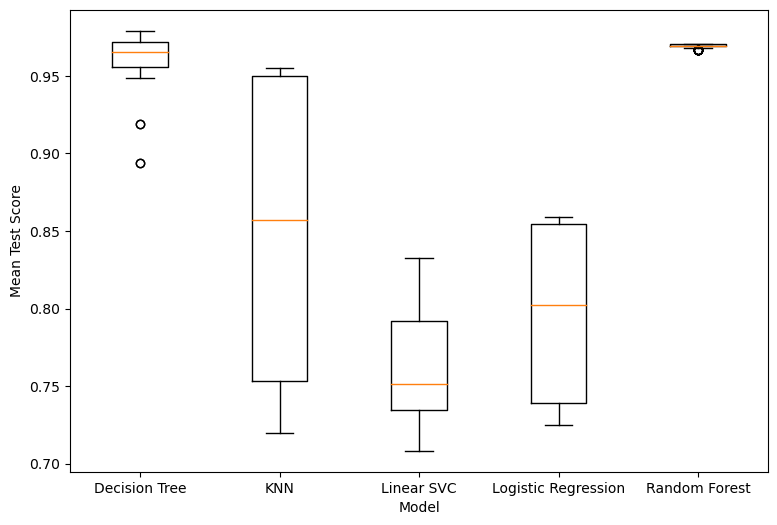

In [20]:
# Show distribution of mean test scores for each model

plt.figure(figsize=(9, 6))

# Define positions for each boxplot along the x-axis (5 models)
positions = range(1, 6)

for position, (model_name, outcome) in zip(positions, outcomes.items()):
    plt.boxplot(outcome['mean_test_score'], positions=[position], widths=0.4)
    
plt.xlabel('Model')
plt.ylabel('Mean Test Score')

plt.xticks([1, 2, 3, 4, 5], list(outcomes.keys()))
plt.show()

## Prediction and Evaluation

In [21]:
target_list = list(cad_data['target_category'].unique())
target_list

['No CAD Disease', 'CAD Disease']


The Metrics for Decision Tree are: 

Accuracy: 0.981
Precision: 1.0
TPR: 0.96
F1_Score: 0.979
TNR: 1.0
AUC_ROC: 0.98 


                precision    recall  f1-score   support

No CAD Disease       0.96      1.00      0.98       159
   CAD Disease       1.00      0.96      0.98       149

      accuracy                           0.98       308
     macro avg       0.98      0.98      0.98       308
  weighted avg       0.98      0.98      0.98       308

[[159   0]
 [  6 143]]


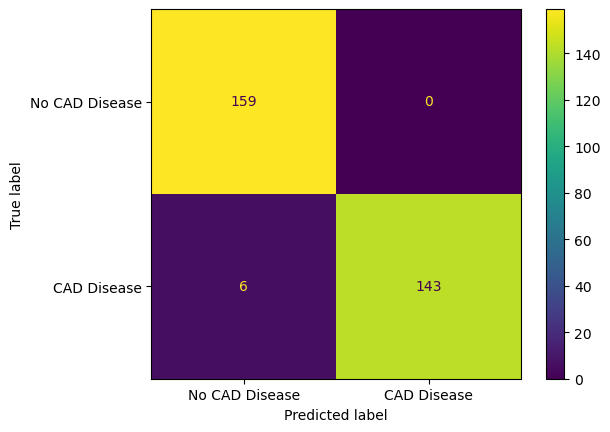

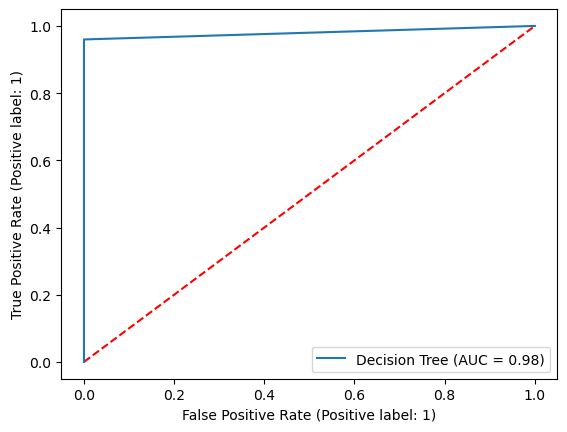


The Metrics for KNN are: 

Accuracy: 1.0
Precision: 1.0
TPR: 1.0
F1_Score: 1.0
TNR: 1.0
AUC_ROC: 1.0 


                precision    recall  f1-score   support

No CAD Disease       1.00      1.00      1.00       159
   CAD Disease       1.00      1.00      1.00       149

      accuracy                           1.00       308
     macro avg       1.00      1.00      1.00       308
  weighted avg       1.00      1.00      1.00       308

[[159   0]
 [  0 149]]


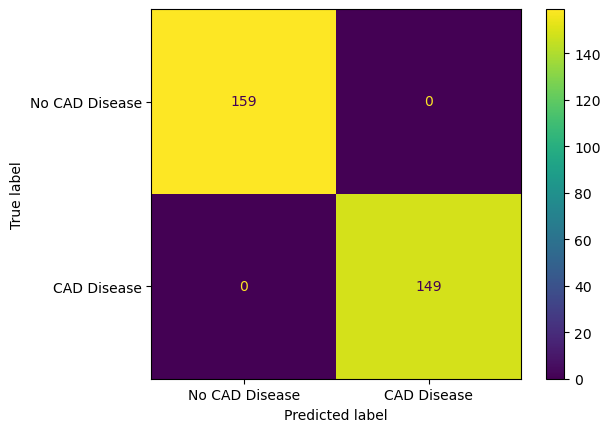

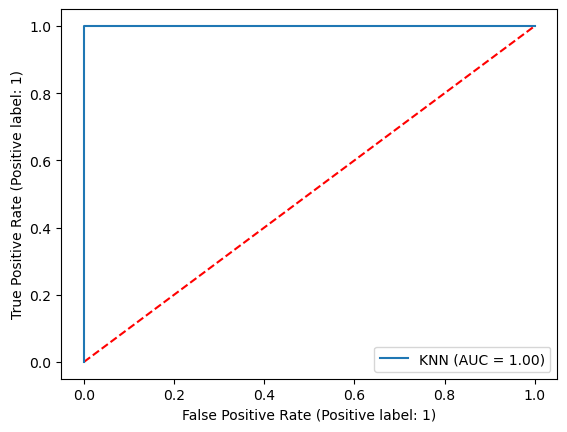


The Metrics for Linear SVC are: 

Accuracy: 0.799
Precision: 0.735
TPR: 0.913
F1_Score: 0.814
TNR: 0.692
AUC_ROC: 0.802 


                precision    recall  f1-score   support

No CAD Disease       0.89      0.69      0.78       159
   CAD Disease       0.74      0.91      0.81       149

      accuracy                           0.80       308
     macro avg       0.81      0.80      0.80       308
  weighted avg       0.82      0.80      0.80       308

[[110  49]
 [ 13 136]]


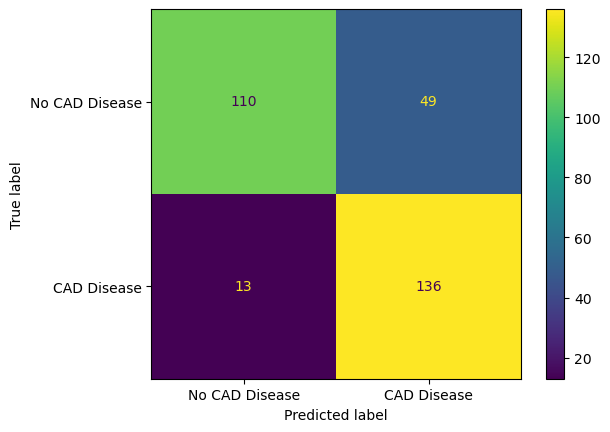

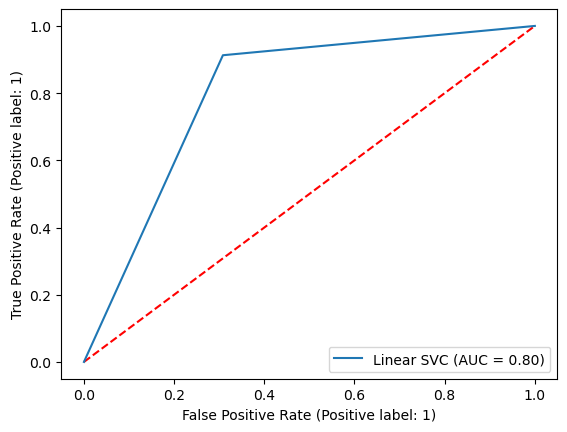


The Metrics for Logistic Regression are: 

Accuracy: 0.818
Precision: 0.775
TPR: 0.879
F1_Score: 0.824
TNR: 0.761
AUC_ROC: 0.82 


                precision    recall  f1-score   support

No CAD Disease       0.87      0.76      0.81       159
   CAD Disease       0.78      0.88      0.82       149

      accuracy                           0.82       308
     macro avg       0.82      0.82      0.82       308
  weighted avg       0.82      0.82      0.82       308

[[121  38]
 [ 18 131]]


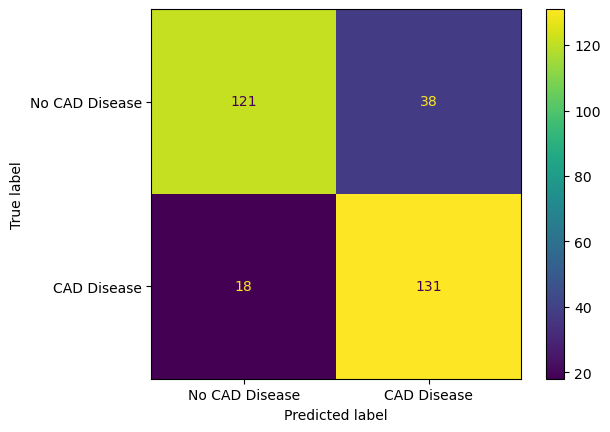

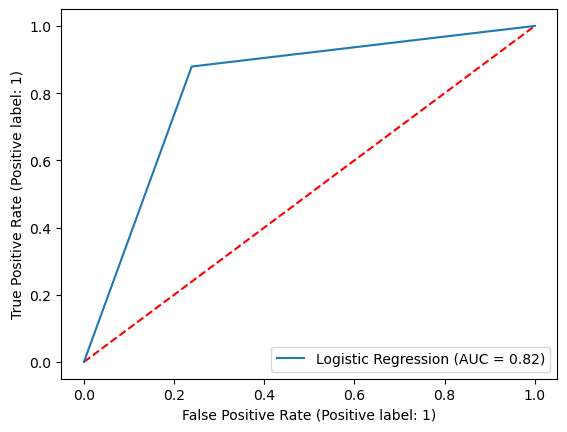


The Metrics for Random Forest are: 

Accuracy: 0.99
Precision: 1.0
TPR: 0.98
F1_Score: 0.99
TNR: 1.0
AUC_ROC: 0.99 


                precision    recall  f1-score   support

No CAD Disease       0.98      1.00      0.99       159
   CAD Disease       1.00      0.98      0.99       149

      accuracy                           0.99       308
     macro avg       0.99      0.99      0.99       308
  weighted avg       0.99      0.99      0.99       308

[[159   0]
 [  3 146]]


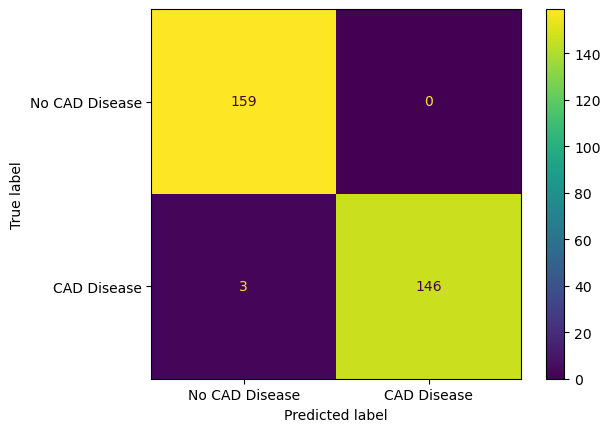

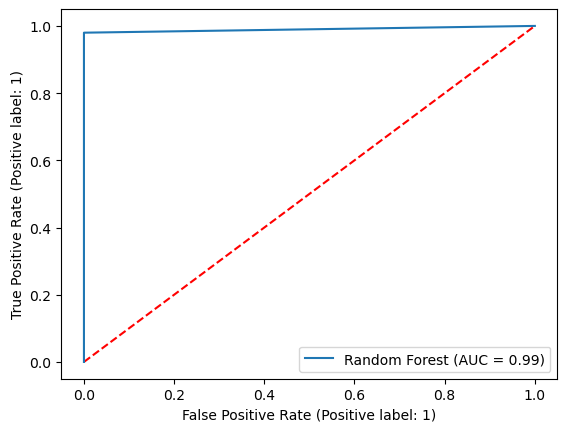

In [22]:
# Lists for evaluation metrics
model_list = []
accuracy_list = []
precision_list = []
tpr_list = []             # TPR = Recall = Sensitivity
f1_score_list = []
tnr_list = []             # TNR = Specificity
auc_roc_list = []

for modelname, outcome in outcomes.items():
    
    model_name = modelname

    model_pred = outcome['best_estimator'].predict(X_test)            # predict target

    cm = confusion_matrix(y_test, model_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_list)

    # Mapping of scorer name to scorer function
    # Round up values to 3 decimal places
    accuracy = round(metrics.accuracy_score(y_test, model_pred), 3)
    precision = round(metrics.precision_score(y_test, model_pred), 3)
    tpr = round(metrics.recall_score(y_test, model_pred), 3)
    f1_score = round(metrics.f1_score(y_test, model_pred), 3)
    tnr = round(cm[0,0]/(cm[0,0]+cm[0,1]), 3)
    roc_auc = round(roc_auc_score(y_test, model_pred), 3)

    # Append results to corresponding lists
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    tpr_list.append(tpr)
    f1_score_list.append(f1_score)
    tnr_list.append(tnr)
    auc_roc_list.append(roc_auc)

    print("\nThe Metrics for {} are: ".format(model_name))

    print('\nAccuracy: {}'.format(accuracy))
    print('Precision: {}'.format(precision))
    print('TPR: {}'.format(tpr))
    print('F1_Score: {}'.format(f1_score))
    print('TNR: {}'.format(tnr))
    print('AUC_ROC: {} \n\n'.format(roc_auc))

    print(classification_report(y_test, model_pred, target_names=target_list))
    print(cm)
    cm_display.plot()
    plt.show()

    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], 'r--')
    RocCurveDisplay.from_predictions(y_test, model_pred, name=str(model_name), ax=ax)
    plt.show()

    print("==" * 40)

### Compilation of Binary Classification Results

In [23]:
# Show lists of results

print("Models: ", model_list)
print("Accuracy: ", accuracy_list)
print("Precision: ", precision_list)
print("TPR: ", tpr_list)
print("F1_Score: ", f1_score_list)
print("TNR: ", tnr_list)
print("AUC_ROC: ", auc_roc_list)

Models:  ['Decision Tree', 'KNN', 'Linear SVC', 'Logistic Regression', 'Random Forest']
Accuracy:  [0.981, 1.0, 0.799, 0.818, 0.99]
Precision:  [1.0, 1.0, 0.735, 0.775, 1.0]
TPR:  [0.96, 1.0, 0.913, 0.879, 0.98]
F1_Score:  [0.979, 1.0, 0.814, 0.824, 0.99]
TNR:  [1.0, 1.0, 0.692, 0.761, 1.0]
AUC_ROC:  [0.98, 1.0, 0.802, 0.82, 0.99]


In [24]:
# Convert lists to a single DataFrame
dict_of_lists = {
    "Model": model_list,
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "F1_Score": f1_score_list,
    "TPR": tpr_list,
    "TNR": tnr_list,
    "AUC_ROC": auc_roc_list
}

all_results = pd.DataFrame(dict_of_lists)
all_results

,Model,Accuracy,Precision,F1_Score,TPR,TNR,AUC_ROC
0,Decision Tree,0.981,1.000,0.979,0.960,1.000,0.980
1,KNN,1.000,1.000,1.000,1.000,1.000,1.000
2,Linear SVC,0.799,0.735,0.814,0.913,0.692,0.802
3,Logistic Regression,0.818,0.775,0.824,0.879,0.761,0.820
4,Random Forest,0.990,1.000,0.990,0.980,1.000,0.990


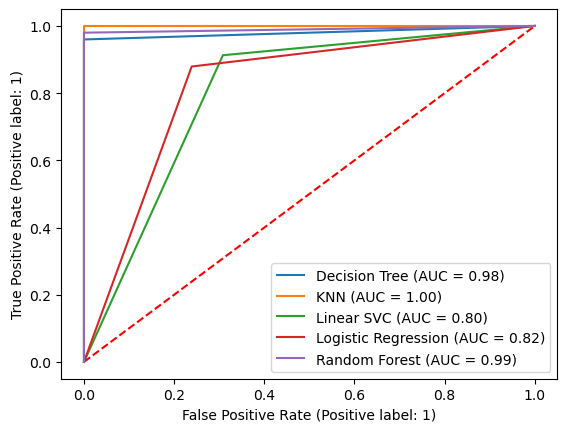

In [25]:
# Show all ROC_AUC curves in one chart

ax = plt.gca()
ax.plot([0, 1], [0, 1], 'r--')

for modelname, outcome in outcomes.items():
    
    model_name = modelname

    model_pred = outcome['best_estimator'].predict(X_test) 

    RocCurveDisplay.from_predictions(y_test, model_pred, name=str(model_name), ax=ax)

plt.show()

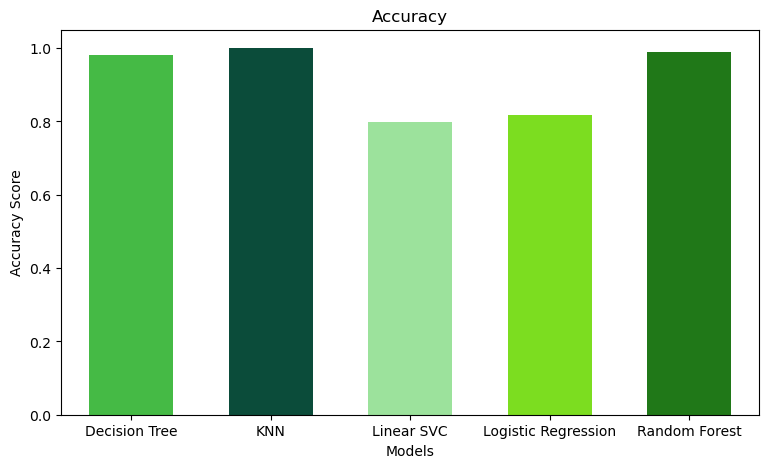

In [26]:
# Display accuracies

plt.figure(figsize=(9,5))

sns.barplot(data=all_results, x='Model', y='Accuracy', width=0.6,
            palette=['#32CD32', '#00573F', '#90EE90', '#7CFC00', '#138808'])

plt.title("Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")

plt.show()

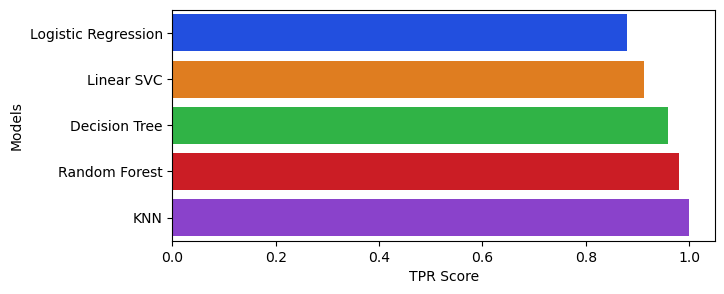

In [27]:
# Show TPR of all models

plt.figure(figsize=(7,3))

sns.barplot(data=all_results, x='TPR', y='Model', palette='bright',
            order= all_results.groupby('Model')['TPR'].mean().sort_values().index)

plt.xlabel("TPR Score")
plt.ylabel("Models")

plt.show()

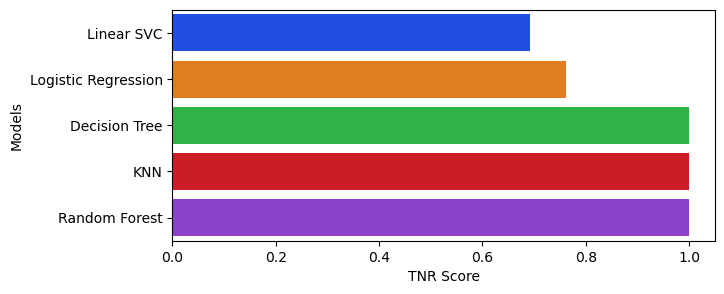

In [28]:
# Show TNR of all models

plt.figure(figsize=(7,3))

sns.barplot(data=all_results, x='TNR', y='Model', palette='bright',
           order= all_results.groupby('Model')['TNR'].mean().sort_values().index)

plt.xlabel("TNR Score")
plt.ylabel("Models")

plt.show()